#            Auto Insurance Claims 

### 1. Import Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Data split, encoding, and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier

# Prediction tool
from ipywidgets import widgets
from IPython.display import display


### 2. Exploratory Data Analysis (EDA)


In [2]:
# Import the dataset and adjust the format for visualization

pd.set_option('display.max_rows', None, 'display.max_columns', None)

df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# General DataFrame info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [6]:
# Identify missing values

df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Modify certain features for exploratory analysis:

  - Convert date features to **Datetime**.

  - Rename features (replace '-' as it's not accepted in some Python operations).

  - Drop the '_c39' feature since it contains no data.

In [7]:
df['policy_bind_date'] =pd.to_datetime(df['policy_bind_date'], format='%Y-%m-%d')

df['incident_date'] =pd.to_datetime(df['incident_date'], format='%Y-%m-%d')

df= df.rename(columns={'capital-gains':'capital_gains'})

df= df.rename(columns={'capital-loss':'capital_loss'})

df = df.drop('_c39', axis=1)

### 2.1. Target variable

In [8]:
# Count cases for each class in 'fraud_reported'. Identify fraudulent ('Y') and non-fraudulent ('N') cases.

count_fraud = df['fraud_reported'].value_counts()
count_fraud

fraud_reported
N    753
Y    247
Name: count, dtype: int64

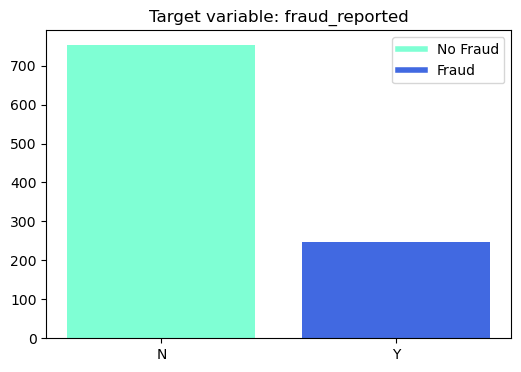

In [9]:
# Visualize the target variable

etiquetas = {'N':'No Fraud', 'Y': 'Fraud'}
plt.figure(figsize=(6,4))
bars= plt.bar(count_fraud.index, count_fraud, color= ['aquamarine', 'royalblue'])
handles = [plt.Line2D([0], [0], color='aquamarine', lw=4), plt.Line2D([0], [0], color='royalblue', lw=4)]
labels = [etiquetas['N'], etiquetas['Y']]
plt.legend(handles=handles, labels=labels)
plt.title('Target variable: fraud_reported')
plt.ylabel('')
plt.show()

### 2.2. Numerical features

In [10]:
# Descriptive metrics for numerical features

df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


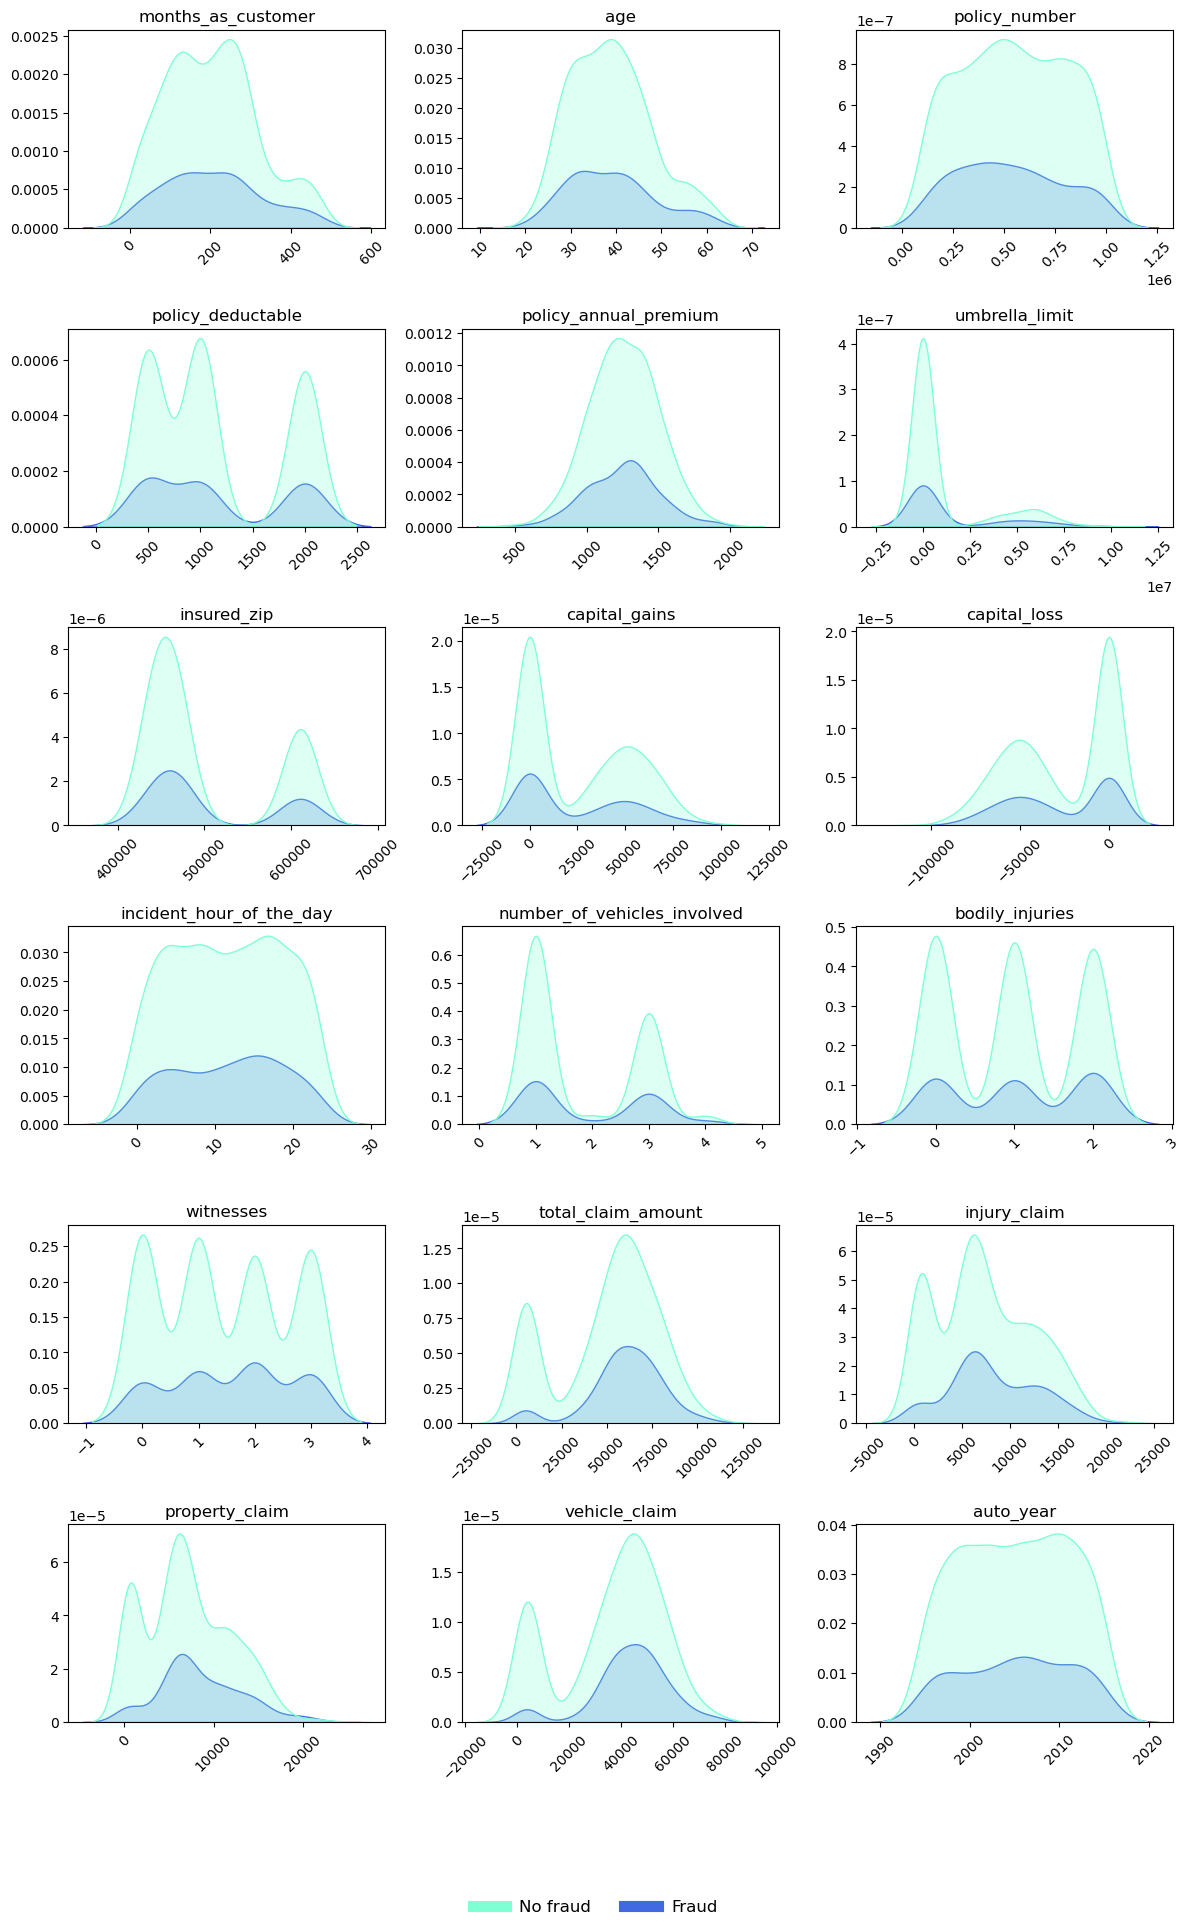

In [11]:
# Study of density based on the target variable.

var_num = df.select_dtypes(exclude=['object', 'category', 'datetime'])
colors ={'N':'aquamarine', 'Y':'royalblue'}
labels={'N': 'No fraud', 'Y':'Fraud'}
num_columns = 3
num_rows = math.ceil(len(var_num.columns)/num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 3 * num_rows))
axes =axes.flatten()

for i, column in enumerate (var_num.columns):
    sns.kdeplot(data=df, x= column, hue='fraud_reported', palette=colors, fill=True, ax=axes[i], 
                hue_order=['N','Y'],legend=False)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45)
    
handles = [plt.Line2D([0], [0], color=colors[label], lw=8) for label in ['N', 'Y']]
fig.legend(handles, [labels[label] for label in ['N', 'Y']], loc='upper center', bbox_to_anchor=(0.5, -0.05),
                        ncol=2, fontsize='large', frameon=False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

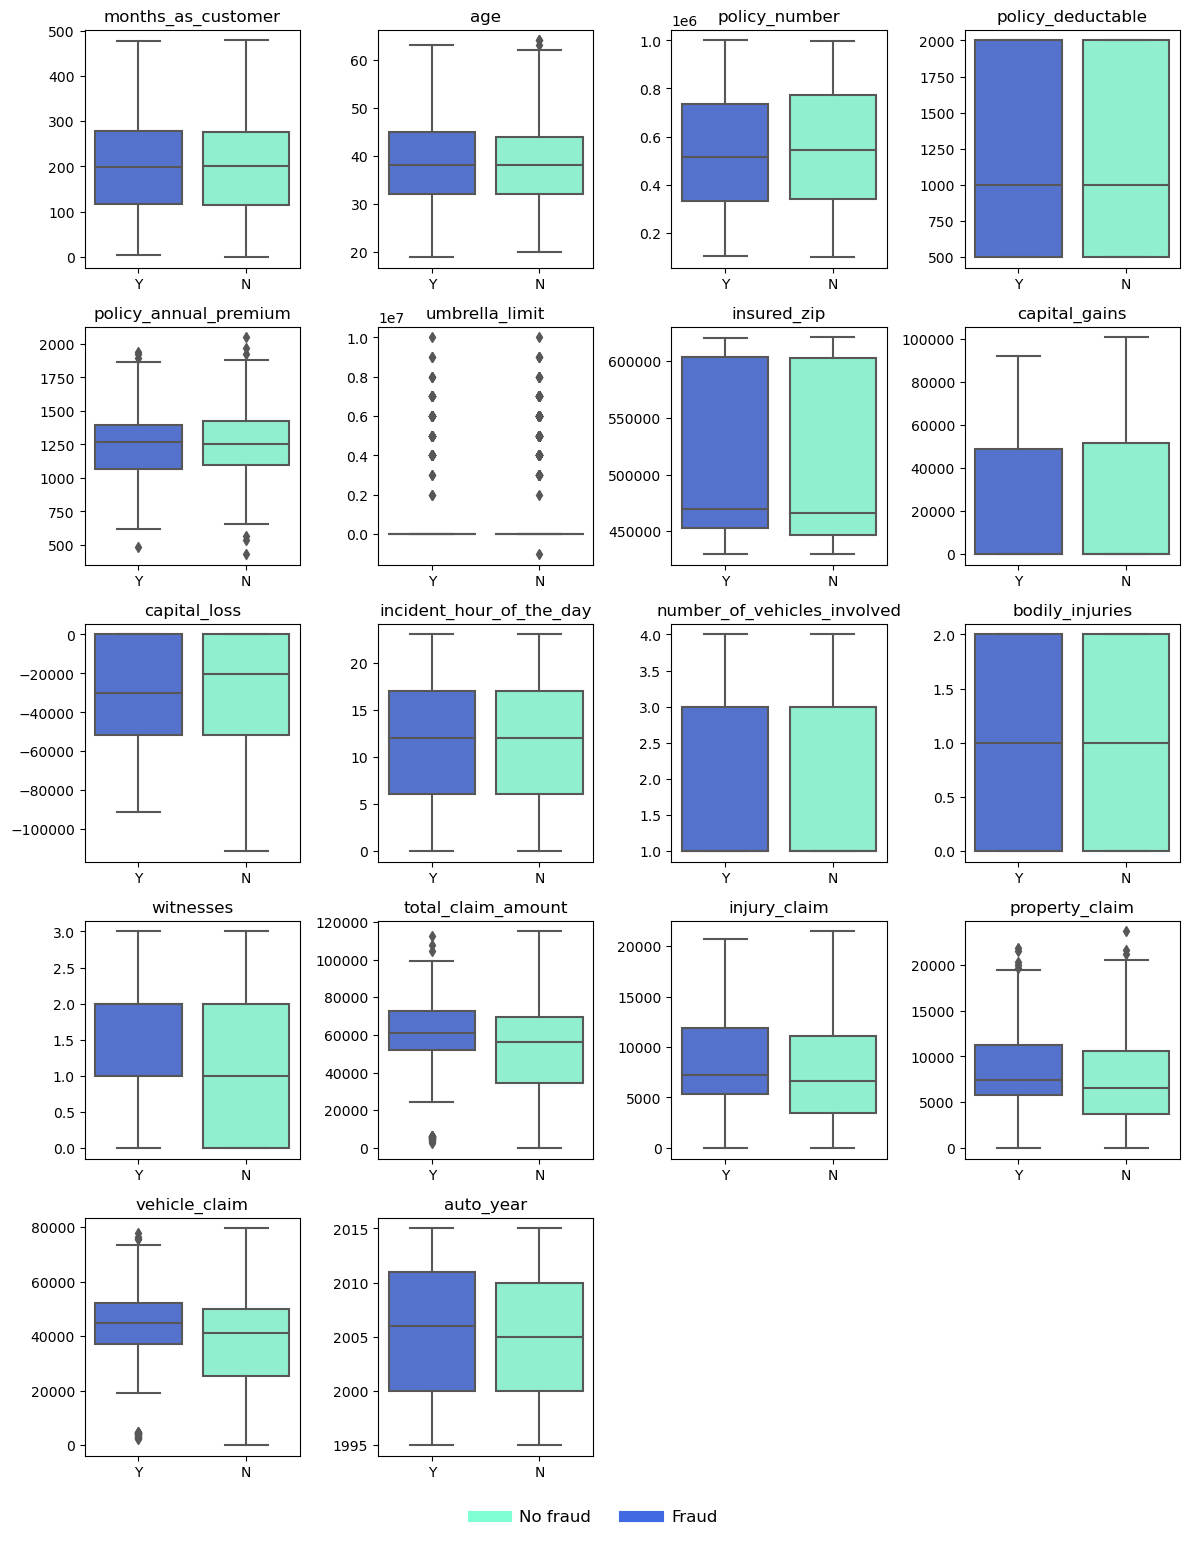

In [12]:
# Study of outliers based on the target variable.

num_columns = 4
num_rows = math.ceil(len(var_num.columns)/num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 3 * num_rows))
axes =axes.flatten()

for i, column in enumerate (var_num.columns):
    sns.boxplot(x='fraud_reported', y= column, data=df, ax=axes[i], palette=colors)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
fig.legend(handles, [labels[label] for label in ['N', 'Y']], loc='upper center', bbox_to_anchor=(0.5, 0),
                        ncol=2, fontsize='large', frameon=False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()    

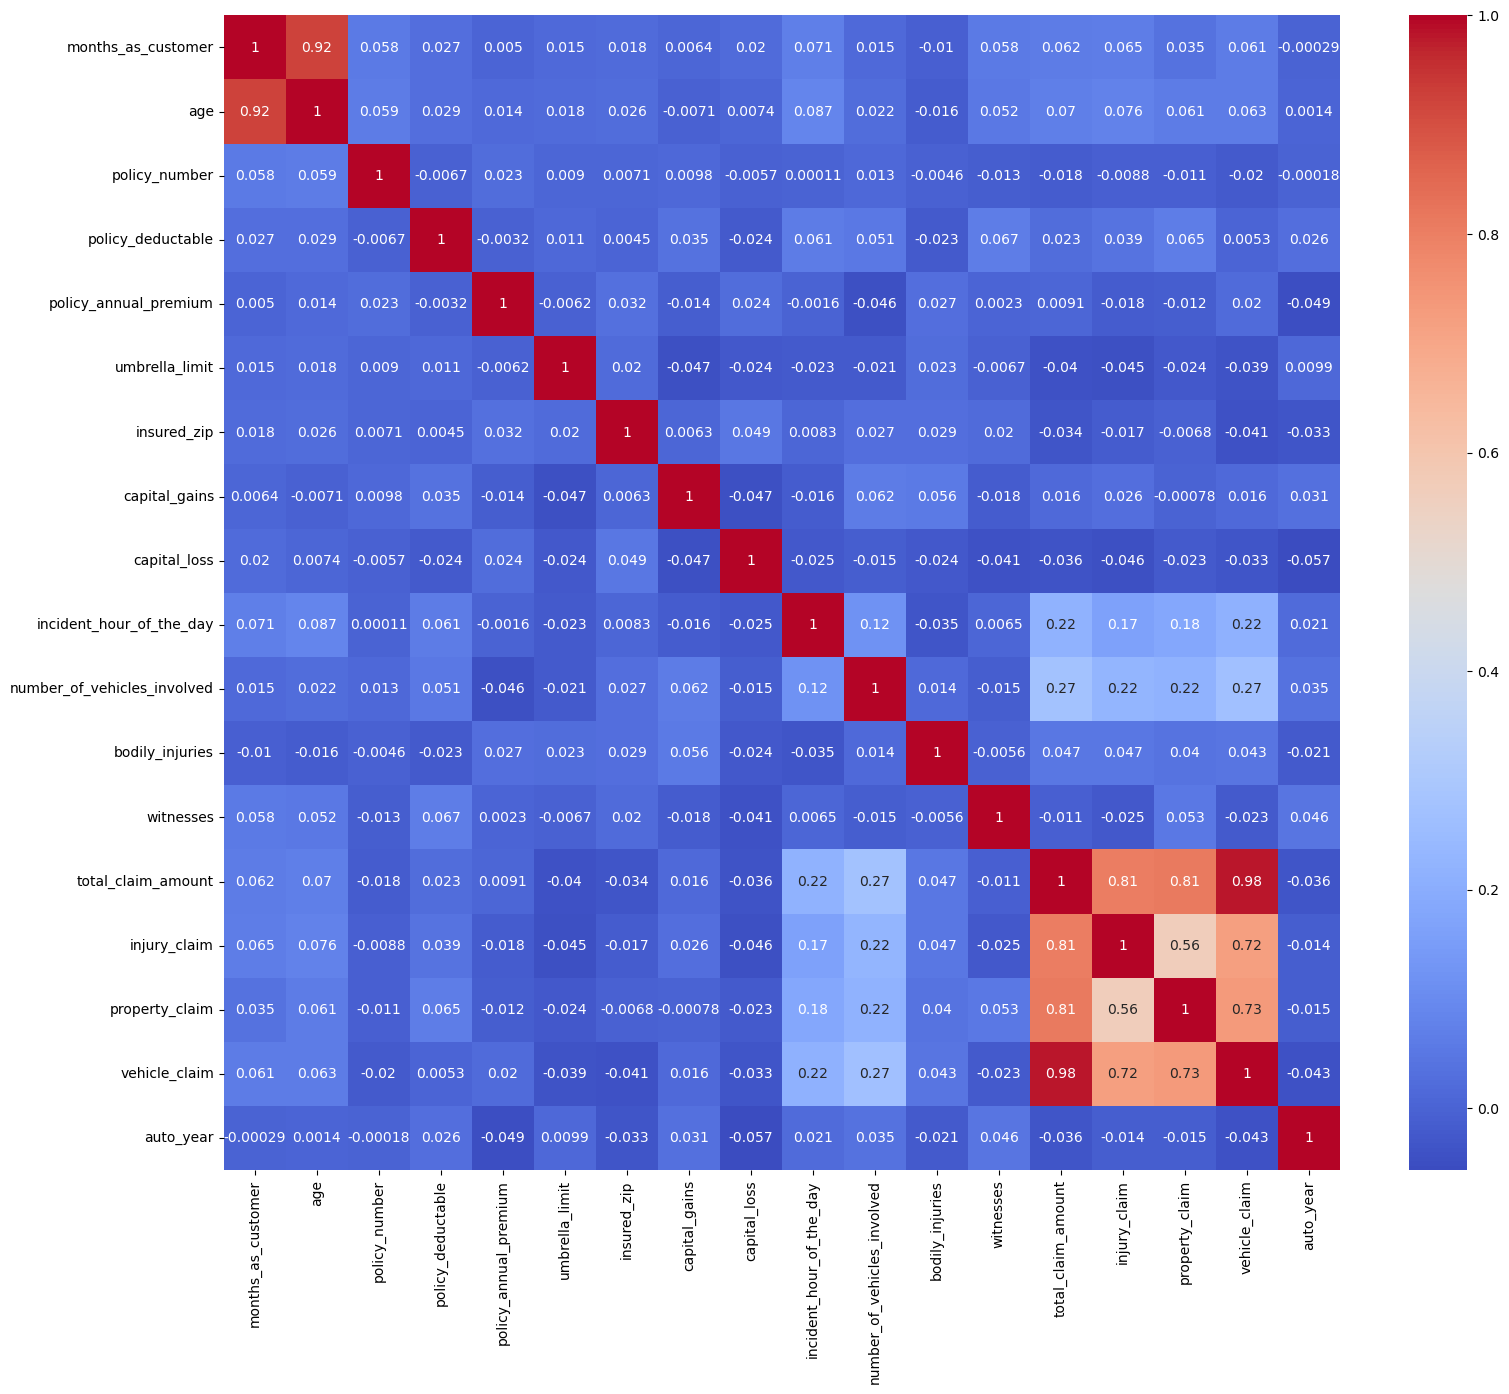

In [13]:
# Study of the relationship between numerical features with correlation matrix.

corr_mat = var_num.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

### 2.3. Categorical features

In [14]:
# Descriptive metrics for categorical features.

describe_cat = df.select_dtypes(include=['object','category']).columns

df[describe_cat].describe()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,909,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,4,4,4,4,7,7,1000,3,3,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,352,351,537,161,93,64,183,419,292,354,292,262,157,1,360,343,80,43,753


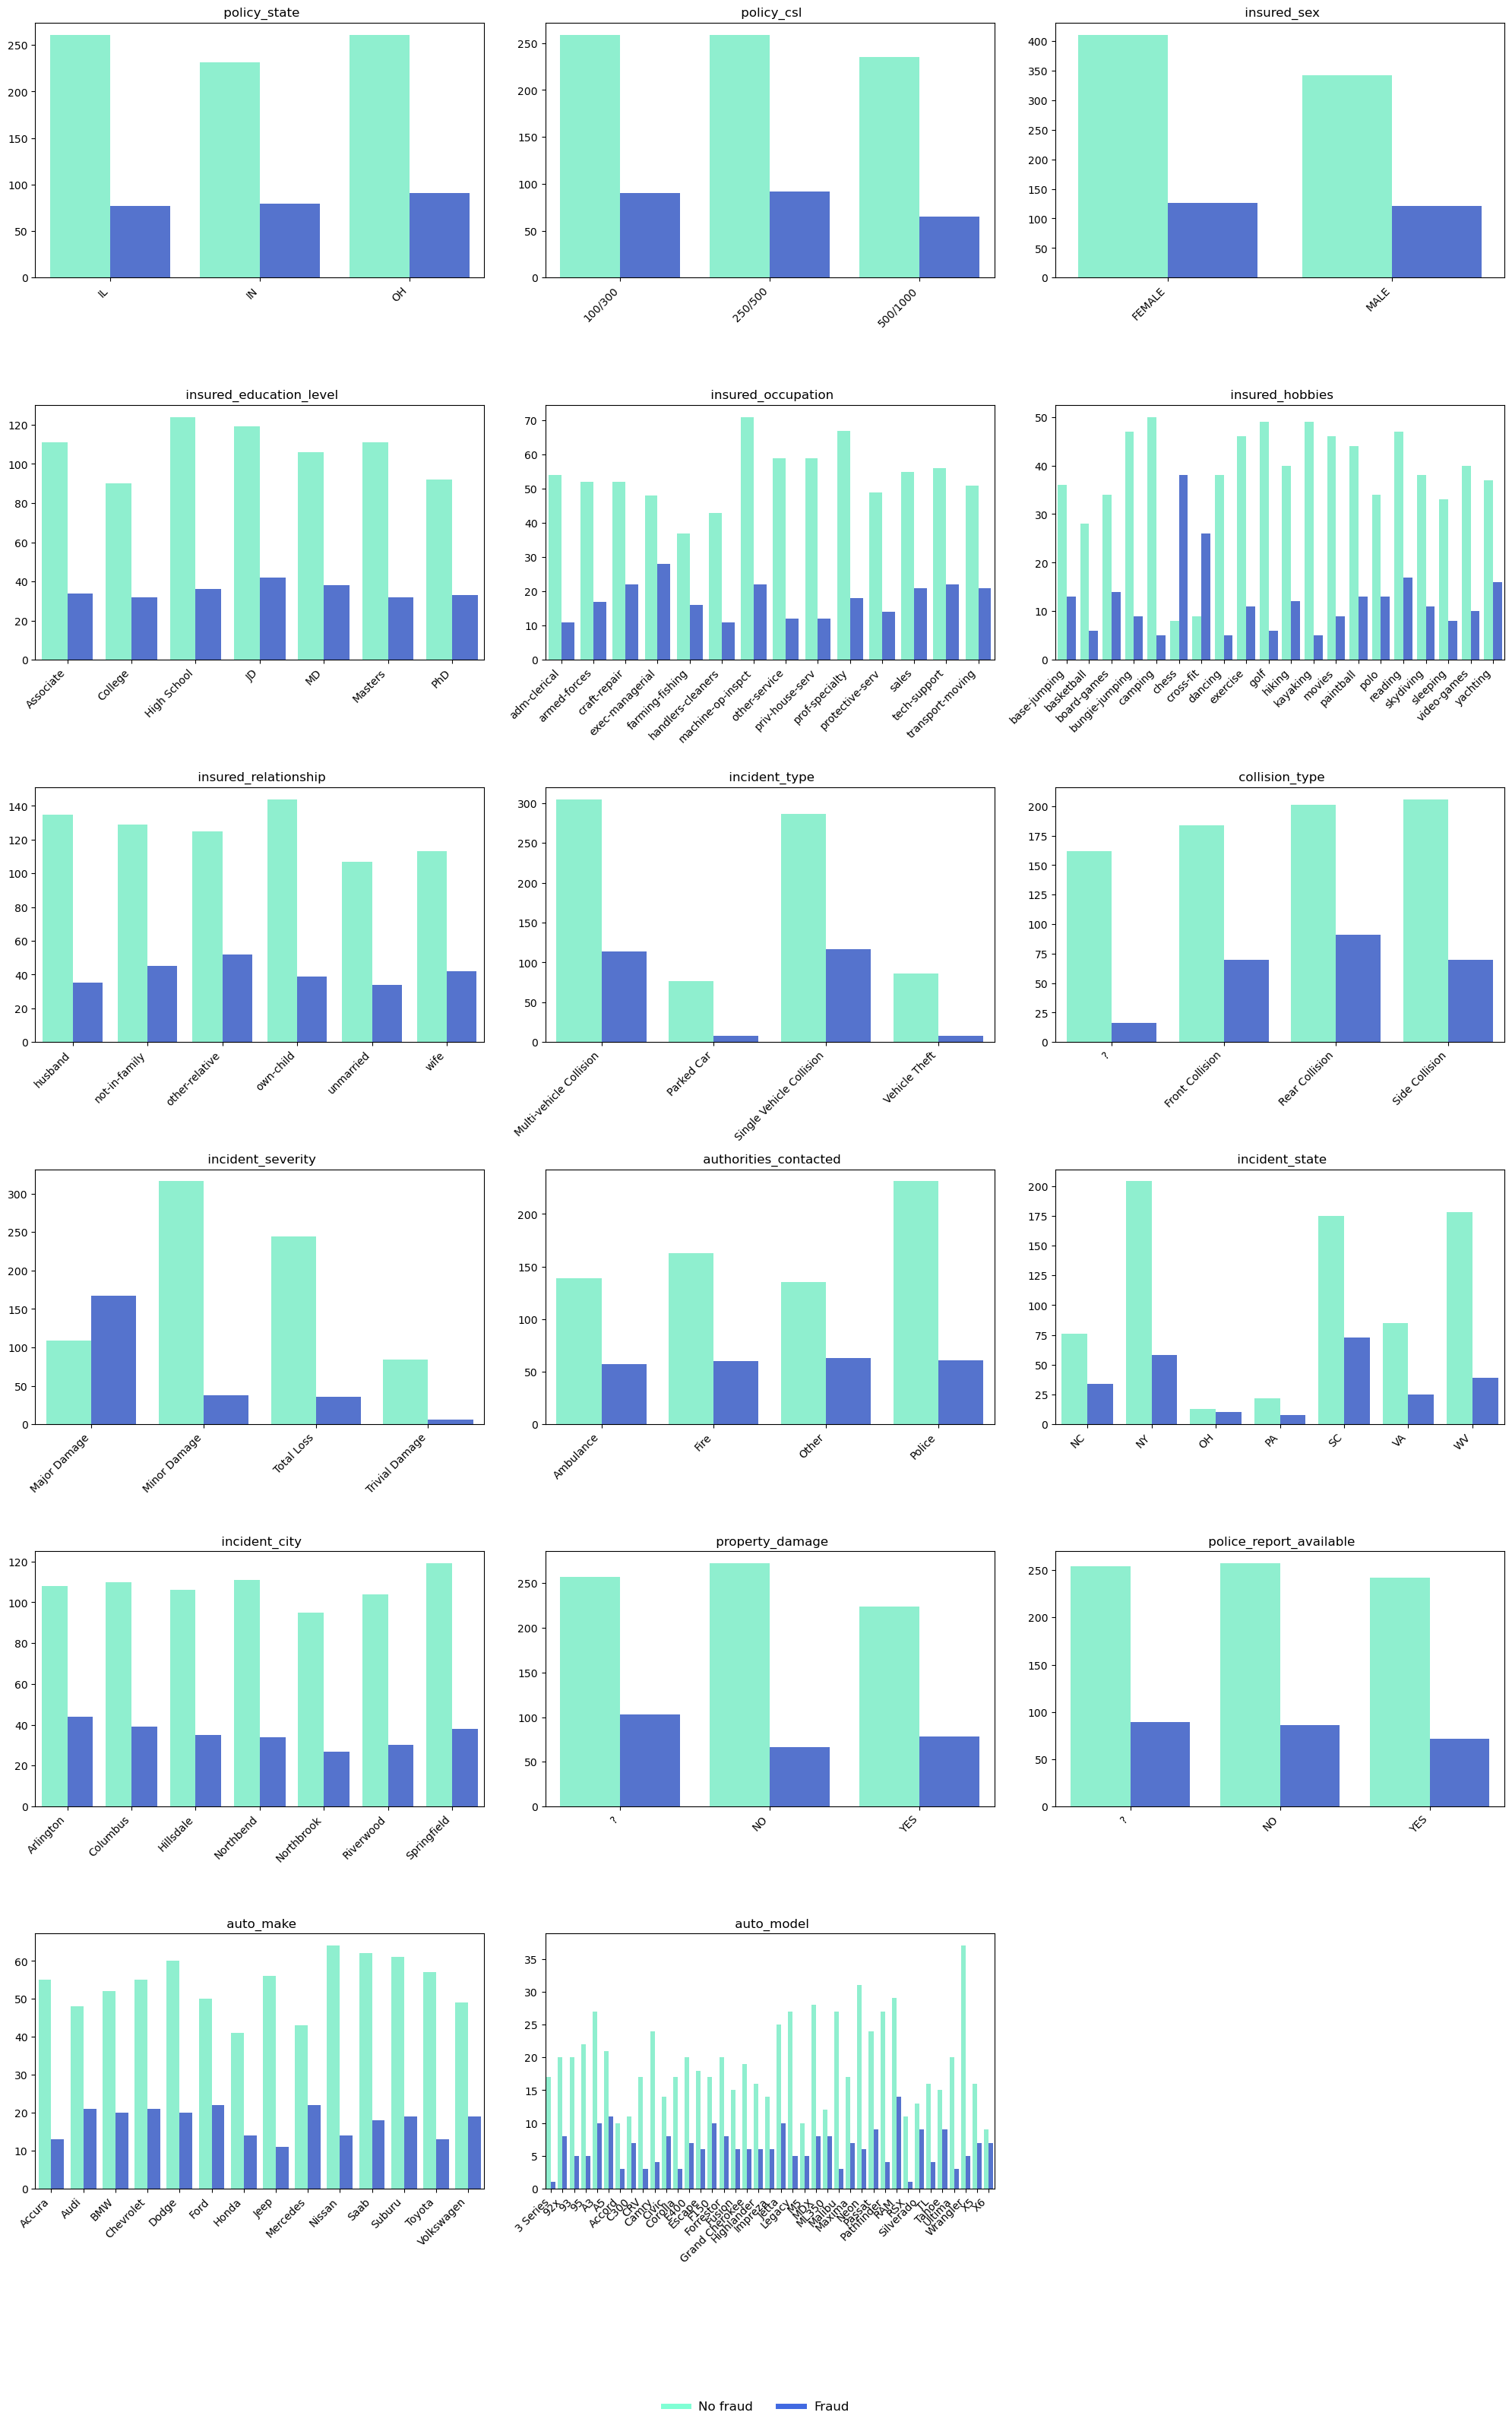

In [15]:
# We plot the categorical features

var_obj = 'fraud_reported' 
var_cat_grafic = df.select_dtypes(include=['object', 'category']).drop(columns=['fraud_reported','incident_location'])
num_columns = 3
num_rows = math.ceil(len(var_cat_grafic.columns) / num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
axes = axes.flatten()


for i, column in enumerate(var_cat_grafic.columns):
    data = df.groupby([column, var_obj]).size().reset_index(name='count')
    sns.barplot(x=column, y='count', hue=var_obj, data=data, palette=colors, ax=axes[i])
    axes[i].set_xticklabels(data[column].unique(), rotation=45, ha='right')
    axes[i].set_title(f' {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend().remove()

handles = [plt.Line2D([0], [0], color=colors[label], lw=5) for label in ['N', 'Y']]
fig.legend(handles=handles, labels=[labels[label] for label in ['N', 'Y']],
           loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize='large', frameon=False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3. Data preprocessing

### 3.1. Handling strange values

**Collision_type**

This feature has one of its categories or classes as ' ?', which is a strange value in the dataset.
We study the possibility of connection with other features that provide information about the nature of the claim, such as 'incident_type'. It matches the accident types 'Vehicle Theft' and 'Parked Car'.

In insurance companies, this type of collision is called 'Own damage'. In other countries, it is known as 'own damage', 'collision coverage', or 'comprehensive coverage'.

*When you cause damage to your own car through carelessness or a maneuver, with no one else involved, or when damage appears on your car and you don't know who's responsible, like vandalism or attempted theft, it is called 'own damage'.* - Allianz Direct

For this reason, we replace the **' ? '** class with **'Own damage'**.

In [16]:
df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [17]:
df.groupby('collision_type')['incident_type'].value_counts()

collision_type   incident_type           
?                Vehicle Theft                94
                 Parked Car                   84
Front Collision  Single Vehicle Collision    139
                 Multi-vehicle Collision     115
Rear Collision   Multi-vehicle Collision     152
                 Single Vehicle Collision    140
Side Collision   Multi-vehicle Collision     152
                 Single Vehicle Collision    124
Name: count, dtype: int64

In [18]:
# We change '?' to 'Own damage'

df['collision_type']  = df['collision_type'].replace('?', 'Own damage')

df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Own damage         178
Name: count, dtype: int64

**Property_damage**

As with the previous feature, there is a class labeled '?'. It represents 36%, while 'NO' represents 33.8%, and 'YES' represents 30.2%. These percentages are quite similar, and it is not coherent to impute with 'NO', as it is not a dominant class. Additionally, given the number that '?' represents, it cannot be considered insignificant, and it could belong to another category.

Therefore, we create a new class called 'Unknown'. 

In [19]:
df['property_damage'].value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [20]:
df['property_damage'] = df['property_damage'].replace('?', 'Unknown')
df['property_damage'].value_counts()

property_damage
Unknown    360
NO         338
YES        302
Name: count, dtype: int64

**Police_report_available**

This feature has the same issue as the previous one. There is no majority class to impute, so we can consider it another class. Taking into account the information provided by this feature, we create a new class called 'Unknown'.

In [21]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [22]:
df['police_report_available'] = df['police_report_available'].replace('?', 'Unknown')
df['police_report_available'].value_counts()

police_report_available
Unknown    343
NO         343
YES        314
Name: count, dtype: int64

### 3.2. Missing values 

**Authorities Contacted**

As observed in the general analysis, there are 91 missing values in this feature. The potential relationship with the features that describe the nature of the incident is studied.

There is a relationship between 'Collision_type' and this feature, as the 91 missing values belong to the 'Own damage' category of the 178 entries. We notice that the remaining 87 belong to the 'Police' class in our feature. 

We might consider imputing the mode as 'Police', but based on logic, when you cause damage to your vehicle while parking, you don’t usually file a police report. Therefore, it could be assumed that no authority was contacted. However, since we have no confirmation of this, the most sensible option is to impute with 'Unknown'.

In [23]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [24]:
df['authorities_contacted'].isna().sum()

91

In [25]:
df.groupby(['authorities_contacted', 'incident_type'])['collision_type'].value_counts()

authorities_contacted  incident_type             collision_type 
Ambulance              Multi-vehicle Collision   Rear Collision     36
                                                 Side Collision     33
                                                 Front Collision    31
                       Single Vehicle Collision  Rear Collision     38
                                                 Front Collision    32
                                                 Side Collision     26
Fire                   Multi-vehicle Collision   Rear Collision     39
                                                 Side Collision     38
                                                 Front Collision    34
                       Single Vehicle Collision  Front Collision    45
                                                 Rear Collision     35
                                                 Side Collision     32
Other                  Multi-vehicle Collision   Side Collision     38
            

In [26]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Unknown       91
Name: count, dtype: int64

### 3.3. Remove Features

We remove the features that will not be useful for our model:

**Policy_number** – This serves as the ID for each customer. It's a data point that we don't need for modeling.

**Policy_bind_date** – We already have the number of months each user has been a customer. The policy issuance date does not provide any new information.

**Total_claim_amount** – In the correlation matrix, we saw that it correlated with 'injury_claim', 'property_claim', and 'vehicle_claim' as it was the result of the sum of these three variables, which could lead to multicollinearity.

**Incident_location** – There are 1,000 different categories, which will not provide any repeating pattern in the sample. To observe patterns in the location, we will use the state and zip code instead.

In [27]:
df = df.drop(['policy_bind_date', 'policy_number', 'total_claim_amount', 'incident_location'], axis=1)

### 4. Feature Engineering

### 4.1. New features

We decompose the **‘incident_date’** feature to provide us with more valuable information. We do this by creating new features:

**- Incident_month** – This gives us the month in which the incident occurred. It helps us understand in which months of the year more fraudulent incidents happen.

**- Incident_day** – This shows the days of the month when frauds happen, but this new feature also helps us create another feature called **‘week_of_the_month’**, which can be useful to know when in the month the highest number of incidents and fraudulent incidents happen.

**- Incident_day_of_the_week** – This tells us which days of the week most frauds happen, helping us determine if they are more common on weekends or on specific weekdays.

We create a new feature **‘times_of_the_day’** from ‘incident_hour_of_the_day’ with categories: ‘early_morning’ (00 – 06 am), ‘morning’ (06 – 12 am), ‘afternoon’ (12 – 18 pm), and ‘night’ (18 – 24 pm). We do this not only to minimize the number of categories but also to provide more relevant information.

In [28]:
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day
df['incident_day_of_the_week']= df['incident_date'].dt.dayofweek + 1

In [29]:
# To properly cover all months, including leap years, we use '21' to mark the last week.

def week_of_the_month(day):
    if day <= 7:
        return 'first_week'
    elif day > 21:  
        return 'last_week'
    else:
        return 'intermediate_weeks'
    
df['week_of_the_month']= df['incident_day'].apply(week_of_the_month)

In [30]:
def times_of_the_day (hour):
    if 0 <= hour < 6:
        return 'early_morning'
    elif 6 <= hour < 12:
        return 'moring'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'
    
df['times_of_the_day']= df['incident_hour_of_the_day'].apply(times_of_the_day)

# Drop original features 

df= df.drop(['incident_date', 'incident_hour_of_the_day'], axis=1)

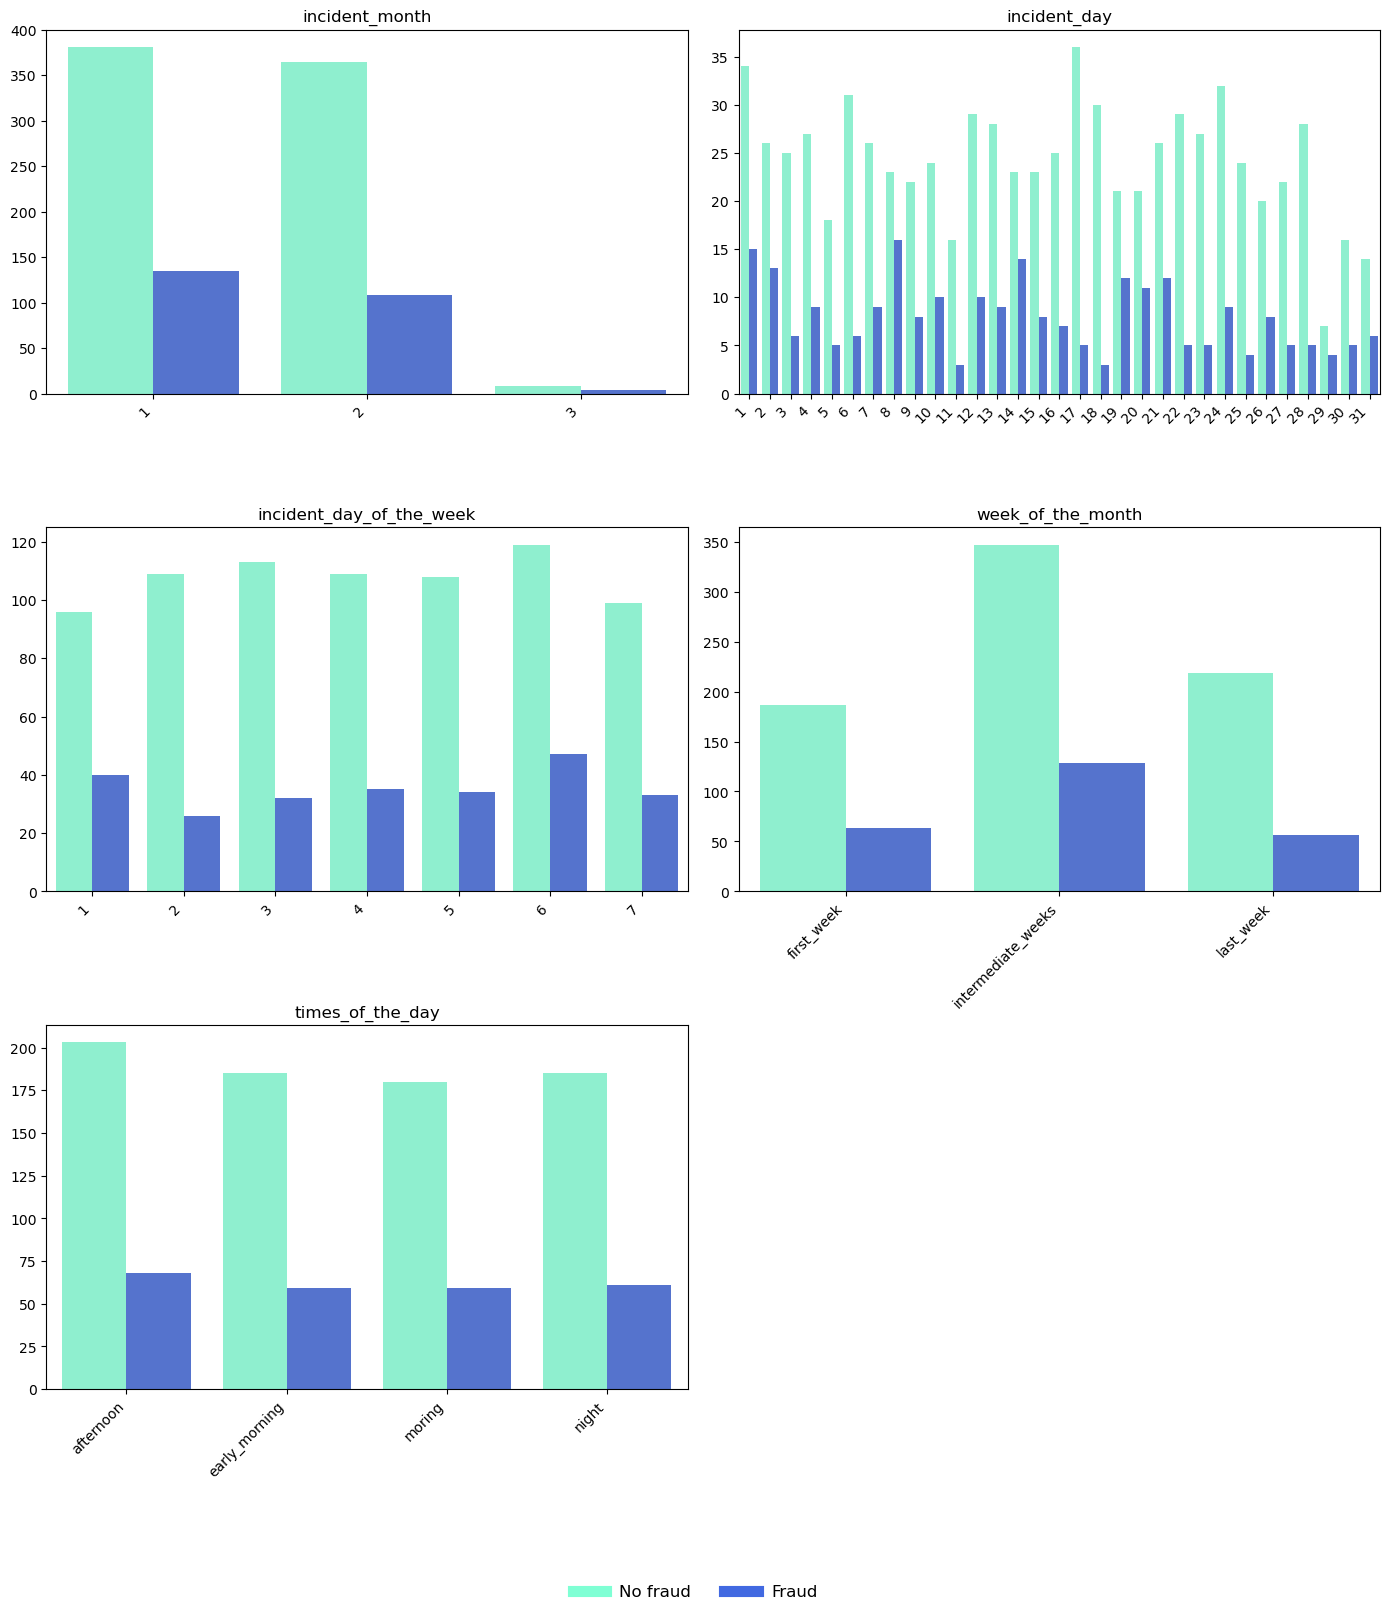

In [31]:
# Plot the new features

date_var = ['incident_month', 'incident_day', 'incident_day_of_the_week', 'week_of_the_month', 'times_of_the_day']

num_columns = 2
num_rows = math.ceil(len(date_var) / num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, 5 * num_rows))
axes = axes.flatten()


for i, column in enumerate(date_var):    
    data = df.groupby([column, 'fraud_reported']).size().reset_index(name='count') 
    sns.barplot(x=column, y='count', hue='fraud_reported', data=data, palette=colors, ax=axes[i])
    axes[i].set_xticklabels(data[column].unique(), rotation=45, ha='right')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend().remove()  


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


handles = [plt.Line2D([0], [0], color=colors[label], lw=8) for label in ['N', 'Y']]
fig.legend(handles, [labels[label] for label in ['N', 'Y']], loc='upper center', bbox_to_anchor=(0.5, -0.05),
           ncol=2, fontsize='large', frameon=False)


plt.tight_layout()
plt.show()

### 4.2. Encode and scale features

### 4.2.1. Split the dataset into train and test sets

In [32]:
X = df.drop(columns=['fraud_reported']) 
y = df['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2.2. Encode and scale

Encode the target variable using Label Encoding

In [33]:
le = LabelEncoder()
y_train = le.fit_transform(y_train) 
y_test = le.transform(y_test)

Encode X_train and X_test with Label Encoding. 

In [34]:
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'fraud_reported']

X_train_le = X_train.copy()
X_test_le = X_test.copy()

for col in categorical_cols:
    X_train_le[col] = le.fit_transform(X_train[col])
    X_test_le[col] = le.transform(X_test[col])
    
scaler = StandardScaler()

X_train_le_scaled = scaler.fit_transform(X_train_le)
X_test_le_scaled = scaler.transform(X_test_le)

X_train_le_scaled = pd.DataFrame(X_train_le_scaled, columns=X_train_le.columns)
X_test_le_scaled = pd.DataFrame(X_test_le_scaled, columns=X_test_le.columns)

In [35]:
# Check that train and test are encoded with the same labels. 

for col in categorical_cols:
    train_encoded = set(X_train_le[col].unique())
    test_encoded = set(X_test_le[col].unique())
    if train_encoded != test_encoded:
        print(f" - {col} Has different labels in X_train_le and X_test_le.")
    else:
        print(f" - {col} Has the SAME encodings in X_train_le and X_test_le.")

 - policy_state Has the SAME encodings in X_train_le and X_test_le.
 - policy_csl Has the SAME encodings in X_train_le and X_test_le.
 - insured_sex Has the SAME encodings in X_train_le and X_test_le.
 - insured_education_level Has the SAME encodings in X_train_le and X_test_le.
 - insured_occupation Has the SAME encodings in X_train_le and X_test_le.
 - insured_hobbies Has the SAME encodings in X_train_le and X_test_le.
 - insured_relationship Has the SAME encodings in X_train_le and X_test_le.
 - incident_type Has the SAME encodings in X_train_le and X_test_le.
 - collision_type Has the SAME encodings in X_train_le and X_test_le.
 - incident_severity Has the SAME encodings in X_train_le and X_test_le.
 - authorities_contacted Has the SAME encodings in X_train_le and X_test_le.
 - incident_state Has the SAME encodings in X_train_le and X_test_le.
 - incident_city Has the SAME encodings in X_train_le and X_test_le.
 - property_damage Has the SAME encodings in X_train_le and X_test_le.


Encode X_train and X_test using One-Hot Encoding, and ordinal categorical features with Label Encoding

In [36]:
ordinal_cols = ['insured_education_level','incident_severity','week_of_the_month','times_of_the_day']

nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]

X_train_ohe = pd.get_dummies(X_train, columns=nominal_cols, drop_first=False)
X_test_ohe = pd.get_dummies(X_test, columns=nominal_cols, drop_first=False)

X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

le = LabelEncoder()

for col in ordinal_cols:
    X_train_ohe[col] = le.fit_transform(X_train_ohe[col])
    X_test_ohe[col] = le.transform(X_test_ohe[col])
    
for col in X_train_ohe.columns:
    if X_train_ohe[col].dtype == 'bool':
        X_train_ohe[col] = X_train_ohe[col].astype(int)
        X_test_ohe[col] = X_test_ohe[col].astype(int)

      
scaler = StandardScaler()
X_train_ohe_scaled = scaler.fit_transform(X_train_ohe)
X_test_ohe_scaled = scaler.transform(X_test_ohe)

X_train_ohe_scaled = pd.DataFrame(X_train_ohe_scaled, columns=X_train_ohe.columns)
X_test_ohe_scaled = pd.DataFrame(X_test_ohe_scaled, columns=X_test_ohe.columns)

In [37]:
# Check that ordinal features encode the same labels in train and test 

for col in ordinal_cols:
    if col in X_train_ohe.columns and col in X_test_ohe.columns:
        train_encoded = set(X_train_ohe[col].unique())
        test_encoded = set(X_test_ohe[col].unique())

        if train_encoded != test_encoded:
            print(f"- {col} Has different labels in X_train_ohe and X_test_ohe.")
        else:
            print(f"- {col} Has the SAME labels in X_train_ohe and X_test_ohe.")


- insured_education_level Has the SAME labels in X_train_ohe and X_test_ohe.
- incident_severity Has the SAME labels in X_train_ohe and X_test_ohe.
- week_of_the_month Has the SAME labels in X_train_ohe and X_test_ohe.
- times_of_the_day Has the SAME labels in X_train_ohe and X_test_ohe.


### 5. Models
### 5.1. Random Forest


In [38]:
# Create a function to compute model metrics

def model_metrics (y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

In [39]:
# Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_ohe_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_ohe_scaled)

# Metrics
model_metrics(y_test, y_pred_rf)

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.84       145
           1       0.62      0.18      0.28        55

    accuracy                           0.74       200
   macro avg       0.69      0.57      0.56       200
weighted avg       0.72      0.74      0.69       200

Confusion Matrix:
[[139   6]
 [ 45  10]]


### 5.2. Logistic Regression


In [40]:
# Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_ohe_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_ohe_scaled)

# Metrics
model_metrics(y_test, y_pred_lr)

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       145
           1       0.40      0.31      0.35        55

    accuracy                           0.68       200
   macro avg       0.58      0.56      0.57       200
weighted avg       0.66      0.68      0.67       200

Confusion Matrix:
[[119  26]
 [ 38  17]]


### 5.3. Support Vector Machines (SVM)

In [41]:
# Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_ohe_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_ohe_scaled)

# Metrics
model_metrics(y_test, y_pred_svm)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       145
           1       0.69      0.16      0.26        55

    accuracy                           0.75       200
   macro avg       0.72      0.57      0.56       200
weighted avg       0.74      0.75      0.69       200

Confusion Matrix:
[[141   4]
 [ 46   9]]


### 5.4. Decision Tree

In [42]:
# Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_le_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_le_scaled)

# Metrics
model_metrics(y_test, y_pred_dt)

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       145
           1       0.51      0.45      0.48        55

    accuracy                           0.73       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.72      0.73      0.72       200

Confusion Matrix:
[[121  24]
 [ 30  25]]


### 5.5. XGBoost

In [43]:
# Model
dtrain = xgb.DMatrix(X_train_le_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_le_scaled, label=y_test)

params = {
    'objective': 'binary:logistic', 
    'max_depth': 6, 
    'eta': 0.3,  
    'eval_metric': 'logloss',  
    'random_state': 42}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Prediction
y_pred_prob_xgb = xgb_model.predict(dtest)
y_pred_xgb = [1 if prob > 0.5 else 0 for prob in y_pred_prob_xgb]

# Metrics
model_metrics(y_test, y_pred_xgb)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       145
           1       0.66      0.60      0.63        55

    accuracy                           0.81       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200

Confusion Matrix:
[[128  17]
 [ 22  33]]


### 5.6.LightGBM

In [44]:
# Model
lgb_model = lgb.LGBMClassifier(
    objective='binary',  
    boosting_type='gbdt',  
    num_leaves=31, 
    learning_rate=0.05,  
    n_estimators=100,  
    random_state=42)
    
lgb_model.fit(X_train_le_scaled, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test_le_scaled)

# Metrics
model_metrics(y_test, y_pred_lgb)

[LightGBM] [Info] Number of positive: 192, number of negative: 608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2101
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240000 -> initscore=-1.152680
[LightGBM] [Info] Start training from score -1.152680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

### 5.7. CatBoost

In [45]:
# Model
cat_model = CatBoostClassifier(
    iterations=100,  
    depth=6,         
    learning_rate=0.3,  
    loss_function='Logloss',  
    random_state=42,
    verbose=0)

cat_model.fit(X_train_le_scaled, y_train)

# Prediction
y_pred_prob_cat = cat_model.predict_proba(X_test_le_scaled)[:, 1]  
y_pred_cat = [1 if prob > 0.5 else 0 for prob in y_pred_prob_cat]

# Metrics
model_metrics(y_test, y_pred_cat)

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       145
           1       0.65      0.60      0.62        55

    accuracy                           0.80       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.80      0.80      0.80       200

Confusion Matrix:
[[127  18]
 [ 22  33]]


### 5.8. Model results

In [46]:
results = []

y_preds = {
    'Random Forest': y_pred_rf,
    'Logistic Regresion': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'SVM': y_pred_svm,           
    'XGBoost': y_pred_xgb,       
    'LightGBM': y_pred_lgb,      
    'CatBoost': y_pred_cat}

for model_name, y_pred in y_preds.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': f'{accuracy:.3f}',
        'Precision': f'{precision:.3f}',
        'Recall': f'{recall:.3f}',
        'F1-Score': f'{f1:.3f}'})

results_models = pd.DataFrame(results)

results_models = results_models.sort_values(by='Accuracy', ascending=False)

results_models

,Model,Accuracy,Precision,Recall,F1-Score
4,XGBoost,0.805,0.660,0.600,0.629
6,CatBoost,0.800,0.647,0.600,0.623
5,LightGBM,0.795,0.640,0.582,0.610
3,SVM,0.750,0.692,0.164,0.265
0,Random Forest,0.745,0.625,0.182,0.282
2,Decision Tree,0.730,0.510,0.455,0.481
1,Logistic Regresion,0.680,0.395,0.309,0.347


In [47]:
# Roc curve for XGBoost

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
auc_roc = roc_auc_score(y_test, y_pred_prob_xgb)

auc_roc

0.8423824451410659

In [48]:
# Roc curve for CatBoost

y_pred_proba_cat = cat_model.predict_proba(X_test_le_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_cat)

auc_roc_cat = roc_auc_score(y_test, y_pred_proba_cat)

auc_roc_cat

0.8321003134796239

In [49]:
# Roc curve for LightGBM

y_pred_proba_lgb = lgb_model.predict_proba(X_test_le_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lgb)

auc_roc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

auc_roc_lgb

0.8145454545454546

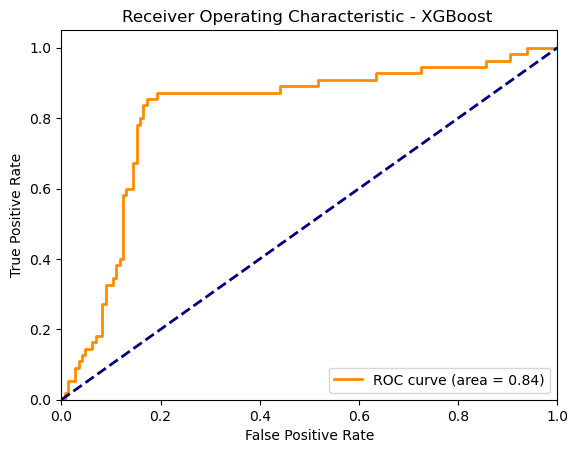

In [50]:
# Plot the Roc curve of the best model  - XGBoost

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost ')
plt.legend(loc='lower right')
plt.show()

### 6. Model evaluation and business use
### 6.1. Feature importance

In [51]:

importances = xgb_model.get_score(importance_type='weight')

importances_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])

importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
7,insured_zip,126.0
11,insured_hobbies,103.0
5,policy_annual_premium,95.0
27,property_claim,74.0
31,auto_year,68.0
33,incident_day,58.0
17,incident_severity,57.0
14,capital_loss,52.0
26,injury_claim,50.0
28,vehicle_claim,50.0


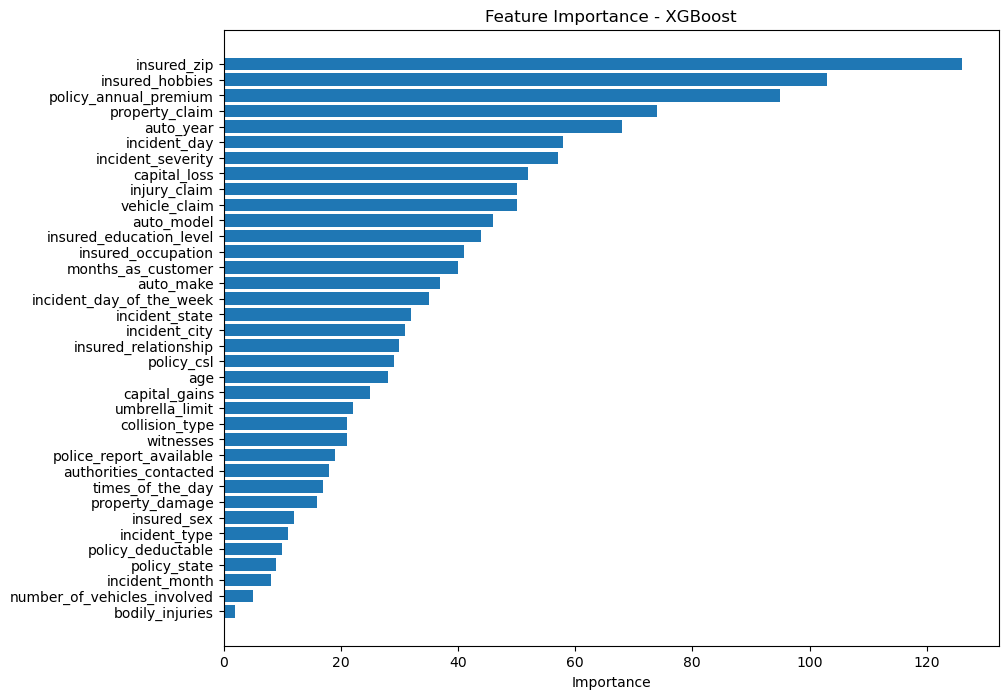

In [52]:

plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()



Based on feature importance, we create a new model using the 10 most influential features.

Retrain the model and develop a tool for predicting fraud in new claims.

In [53]:
top10_var= importances_df['Feature'].head(10).tolist()
top10_df = df[top10_var].copy()

top10_df.head()

,insured_zip,insured_hobbies,policy_annual_premium,property_claim,auto_year,incident_day,incident_severity,capital_loss,injury_claim,vehicle_claim
0,466132,sleeping,1406.91,13020,2004,25,Major Damage,0,6510,52080
1,468176,reading,1197.22,780,2007,21,Minor Damage,0,780,3510
2,430632,board-games,1413.14,3850,2007,22,Minor Damage,0,7700,23100
3,608117,board-games,1415.74,6340,2014,10,Major Damage,-62400,6340,50720
4,610706,board-games,1583.91,650,2009,17,Minor Damage,-46000,1300,4550


In [54]:
top10_encode=top10_df.copy()

categoricas_top10 = top10_encode.select_dtypes(include=['object', 'category']).columns

for col in categoricas_top10:
    top10_encode[col]=le.fit_transform(top10_encode[col])
    
X = top10_encode 
y = df['fraud_reported']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train = le.fit_transform(y_train) 
y_test = le.transform(y_test)

In [55]:
# Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic', 
    'max_depth': 6, 
    'eta': 0.3,  
    'eval_metric': 'logloss',  
    'random_state': 42}

xgb_model_top10 = xgb.train(params, dtrain, num_boost_round=100)

# Prediction
y_pred_prob_xgb = xgb_model_top10.predict(dtest)
y_pred_xgb = [1 if prob > 0.5 else 0 for prob in y_pred_prob_xgb]

# Metrics
model_metrics(y_test, y_pred_xgb)

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       145
           1       0.65      0.56      0.60        55

    accuracy                           0.80       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.79      0.80      0.79       200

Confusion Matrix:
[[128  17]
 [ 24  31]]


### Prediction tool
 

In [56]:
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categoricas_top10}

dicc = {}
for feature in top10_var:
    if feature in categoricas_top10:
            dicc[feature] = widgets.Dropdown(
            options=[(option, option) for option in df[feature].unique()],
            description=feature + ':',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='400px'))
    else:
            dicc[feature] = widgets.FloatText(
            value=0.0,
            description=feature + ':',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='400px'))
       
        
# Generate a button to return the prediction

button = widgets.Button(description="Predict")

# Create the function 'unknown_values' to ensure the tool continues working if incorrect data is entered.

def unknown_values (label_encoder, value):
    try:
        return label_encoder.transform([value])[0]
    except:
        return -1  
    
# Function to predict new claims

def click_button (b):
    input_data = {feature: [dicc[feature].value] for feature in top10_var} # New DataFrame for input data
    data_table_df = pd.DataFrame(input_data)
    for feature in categoricas_top10: # Encoding of the new DataFrame (data_table_df)
        data_table_df[feature] = data_table_df[feature].apply(lambda x: unknown_values(label_encoders[feature], x))
    df_scaled = scaler.transform(data_table_df) # Scale the new DataFrame

    # Prediction using the trained model with the top 10 features
    dtest = xgb.DMatrix(df_scaled)
    pred = xgb_model_top10.predict(dtest)

    # Probability
    probability_percentage = pred[0] * 100
    print(f'Fraud probability: {probability_percentage:.2f}%')


button.on_click(click_button)
display(*dicc.values(), button)

FloatText(value=0.0, description='insured_zip:', layout=Layout(width='400px'), style=DescriptionStyle(descript…

Dropdown(description='insured_hobbies:', layout=Layout(width='400px'), options=(('sleeping', 'sleeping'), ('re…

FloatText(value=0.0, description='policy_annual_premium:', layout=Layout(width='400px'), style=DescriptionStyl…

FloatText(value=0.0, description='property_claim:', layout=Layout(width='400px'), style=DescriptionStyle(descr…

FloatText(value=0.0, description='auto_year:', layout=Layout(width='400px'), style=DescriptionStyle(descriptio…

FloatText(value=0.0, description='incident_day:', layout=Layout(width='400px'), style=DescriptionStyle(descrip…

Dropdown(description='incident_severity:', layout=Layout(width='400px'), options=(('Major Damage', 'Major Dama…

FloatText(value=0.0, description='capital_loss:', layout=Layout(width='400px'), style=DescriptionStyle(descrip…

FloatText(value=0.0, description='injury_claim:', layout=Layout(width='400px'), style=DescriptionStyle(descrip…

FloatText(value=0.0, description='vehicle_claim:', layout=Layout(width='400px'), style=DescriptionStyle(descri…

Button(description='Predict', style=ButtonStyle())